In [2]:
url = 'https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/data.csv'
!wget $url


--2024-10-08 12:26:39--  https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/data.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data.csv’

data.csv                [  <=>               ]   1.63M  3.81MB/s    in 0.4s    

2024-10-08 12:26:40 (3.81 MB/s) - ‘data.csv’ saved [1706685]



In [3]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive

drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab Notebooks/cars.csv'

df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [6]:
for col in df.columns:
    print(str(col) + str(df[col].unique()[:5]) )
    print( "the number of unique values " + str(df[col].nunique() ) + "\n")

make['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
the number of unique values 48

model['1_series_m' '1_series' '100' '124_spider' '190-class']
the number of unique values 914

year[2011 2012 2013 1992 1993]
the number of unique values 28

engine_fuel_type['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
the number of unique values 10

engine_hp[335. 300. 230. 320. 172.]
the number of unique values 356

engine_cylinders[ 6.  4.  5.  8. 12.]
the number of unique values 9

transmission_type['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
the number of unique values 5

driven_wheels['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
the number of unique values 4

number_of_doors[ 2.  4.  3. nan]
the number of unique values 3

market_category['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
the number of unique

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

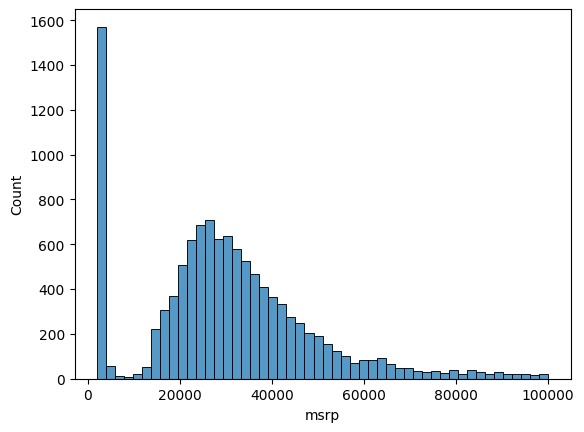

In [8]:
sns.histplot(df.msrp[ df.msrp < 100000], bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

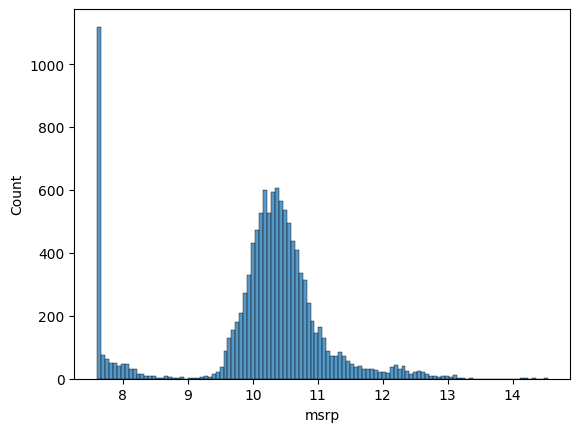

In [9]:
price_logs = np.log1p(df.msrp)
sns.histplot(price_logs)

In [10]:
df.isnull().sum()

,0
make,0
model,0
year,0
engine_fuel_type,3
engine_hp,69
engine_cylinders,30
transmission_type,0
driven_wheels,0
number_of_doors,6
market_category,3742


In [11]:
# prompt: Calculate the number of rows in df

N = len(df)
n_val = int(0.2 * N)
n_test = int(0.2 * N)
n_train = N - n_val - n_test

In [12]:
df_val = df.iloc[:n_train]
df_test = df.iloc[n_train:n_val+n_train]
df_train = df.iloc[n_val+n_train:]

In [13]:
idx = np.arange(N)
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [14]:
df_val = df.iloc[idx[:n_train]]
df_test = df.iloc[idx[n_train:n_val+n_train]]
df_train = df.iloc[idx[n_val+n_train:]]
df_val.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [15]:
df_train = df_train.reset_index( drop = True )
df_val   = df_val.reset_index(   drop = True )
df_test  = df_test.reset_index(  drop = True )
y_train = np.log1p( df_train.msrp.values )
y_val = np.log1p( df_val.msrp.values )
y_test = np.log1p( df_test.msrp.values )
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## Linear Regression

In [16]:
df_train.iloc[10]

,10
make,mazda
model,3
year,2016
engine_fuel_type,regular_unleaded
engine_hp,155.0
engine_cylinders,4.0
transmission_type,manual
driven_wheels,front_wheel_drive
number_of_doors,4.0
market_category,NaN


In [17]:
xi = [453, 11, 86]
w0 = 7.17
w1 = [0.01, 0.04, 0.002]

In [18]:
def linear_regression(xi):
  n = len(xi)

  pred = w0
  for j in range(n):
    pred += w1[j] * xi[j]

  return pred

In [19]:
linear_regression(xi)
np.expm1(12.312)

222347.2221101062

In [20]:
def dot(xi, w):
  n = len(xi)
  res = 0.0
  for j in range(n):
    res += xi[j] * w[j]
  return res

In [21]:
w_new = [w0] + w1
w_new

[7.17, 0.01, 0.04, 0.002]

In [22]:
def linear_regression(xi):
  xi = [1] + xi
  return dot(xi, w_new)

In [23]:
linear_regression(xi)

12.312

In [24]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 =  [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [25]:
def linear_regression(X):
  X = np.array(X)
  return X.dot(w_new)

linear_regression(X)

array([12.38 , 13.552, 12.312])

In [26]:
def linear_regression(X, y):
  pass

In [27]:
X = [ [148, 24, 1385],
      [132, 25, 2031],
      [453, 11, 86  ],
      [153, 24, 185],
      [172, 25, 201],
      [413, 11, 86  ],
      [38, 54, 185],
      [142, 25, 431],
      [153, 31, 86  ],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 153,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 153,   31,   86]])

In [28]:
ones = np.ones(X.shape[0])
X = np.column_stack([ones, X])
X.shape

(9, 4)

In [29]:
XTX = X.dot(X.T)
XTX

array([[1940706., 2833072.,  186419.,  279446.,  304442.,  180499.,
         263146.,  618552.,  142499.],
       [2833072., 4143011.,  234738.,  396532.,  431561.,  229458.,
         382102.,  894731.,  195638.],
       [ 186419.,  234738.,  212727.,   85484.,   95478.,  194607.,
          33719.,  101668.,   77047.],
       [ 279446.,  396532.,   85484.,   58211.,   64102.,   79364.,
          41336.,  102062.,   40064.],
       [ 304442.,  431561.,   95478.,   64102.,   70611.,   88598.,
          45072.,  111681.,   44378.],
       [ 180499.,  229458.,  194607.,   79364.,   88598.,  178087.,
          32199.,   95988.,   70927.],
       [ 263146.,  382102.,   33719.,   41336.,   45072.,   32199.,
          38586.,   86482.,   23399.],
       [ 618552.,  894731.,  101668.,  102062.,  111681.,   95988.,
          86482.,  206551.,   59568.],
       [ 142499.,  195638.,   77047.,   40064.,   44378.,   70927.,
          23399.,   59568.,   31767.]])

In [30]:
y= np.array([100, 200, 150 , 250 , 100, 200, 150 , 250, 120])

In [31]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv.dot(XTX).shape

(9, 9)

In [32]:
y.dot(XTX_inv.dot(X))

array([337.08942413,  23.00701141,   0.78601837,  48.51203918])

In [33]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

## Car Price Baseline Model

In [34]:
df_train.dtypes

,0
make,object
model,object
year,int64
engine_fuel_type,object
engine_hp,float64
engine_cylinders,float64
transmission_type,object
driven_wheels,object
number_of_doors,float64
market_category,object


In [35]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [36]:
X_train = df_train[base].values
X_train = df_train[base].fillna(0).values

In [37]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(7.501049242428481,
 array([ 9.28537863e-03, -1.12629232e-01,  4.37496896e-02, -8.33364646e-03,
        -2.59786663e-05]))

<Axes: ylabel='Count'>

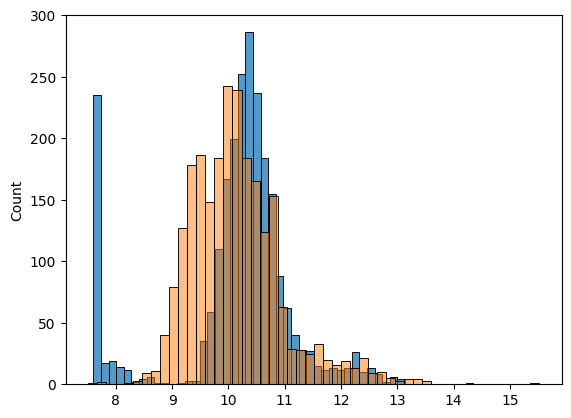

In [38]:
y_pred = w0 + X_train.dot(w)
sns.histplot(y_train, bins=50)
sns.histplot(y_pred, bins=50, alpha = 0.5)

In [39]:
# RMSE
def rmse(y_pred, y_train):
  error = y_pred - y_train
  squ_err = error ** 2
  squ_err = squ_err.mean()
  return squ_err

rmse( y_pred , y_train)

0.5335881095300103

In [40]:
# validation and test



def prepare_data(df):
   df_num = df[base]
   df = df_num[base].fillna(0)
   X = df.values
   return X

X = prepare_data(df_train)
w0, w = train_linear_regression(X_train, y_train)


X_val = prepare_data(df_val)

y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5907626220031165

## Data Engineering

In [41]:


def prepare_data(df):
  df['age'] = df.year.max() - df.year
  features = base + ['age']

  df_num = df[features]
  df = df_num[base].fillna(0)
  X = df.values
  return X

X_train = prepare_data(df_train)
df_train.dtypes


,0
make,object
model,object
year,int64
engine_fuel_type,object
engine_hp,float64
engine_cylinders,float64
transmission_type,object
driven_wheels,object
number_of_doors,float64
market_category,object


In [76]:
df_train = df.copy()
df_train.fillna(0)
for val in [4, 2, 3]:

  df_train[f'num_door_{val:d}'] = (df.number_of_doors == val).astype('int')

df_train.head()

makes = list(df_train.make.value_counts().head().index)
for val in makes:
  df_train[f'make_{val:s}'] = (df_train.make == val).astype('int')
# df_train.make.value_counts().head.index
df_train.head()


list_top_titles = list(['make', 'transmission_type'])
for title in list_top_titles:
  top_five = list( df_train[title].value_counts().head().index)
  print(top_five)
  for val in top_five:
    df_train[f'{title}_{val:s}'] = (df_train[title] == val).astype('int')

df.transmission_type.value_counts()

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']
['automatic', 'manual', 'automated_manual', 'direct_drive', 'unknown']


,count
transmission_type,
automatic,8266
manual,2935
automated_manual,626
direct_drive,68
unknown,19


dtype('O')

In [90]:

df_train = df.copy()
df_train.fillna(0)
categories = {}
for c in list_top_titles:
  categories[c] = list(df_train[c].value_counts().head().index)

for c , value in categories.items():
  for v in value:
    df_train[f'{c:s}_{v:s}'] = (df_train[c] == v).astype('int')
print(categories)
df_train.head()

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'], 'transmission_type': ['automatic', 'manual', 'automated_manual', 'direct_drive', 'unknown']}


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,...,make_chevrolet,make_ford,make_volkswagen,make_toyota,make_dodge,transmission_type_automatic,transmission_type_manual,transmission_type_automated_manual,transmission_type_direct_drive,transmission_type_unknown
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",...,0,0,0,0,0,0,1,0,0,0
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",...,0,0,0,0,0,0,1,0,0,0
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",...,0,0,0,0,0,0,1,0,0,0
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",...,0,0,0,0,0,0,1,0,0,0
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,...,0,0,0,0,0,0,1,0,0,0
